<h1 align=center><font size = 5>Applied Data Science Capstone - WEEK 5</font></h1> 
<h1 align=center><font size = 5>Capstone Project - The Battle of Neighborhoods</font></h1> 
<h1 align=center><font size = 5>Select a borough to set up a productive business in Colombia</font></h1> 
<h3><font size = 2>Coursera, Agosto 2019</font></h3>  
* you will have the opportunity to be as creative as you want and come up with an idea to leverage the Foursquare location data to explore or compare neighborhoods or cities of your choice or to come up with a problem that you can use the Foursquare location data to solve*

___


#### 1. Install all libraries required

In [5]:
pip install xlrd

     |████████████████████████████████| 112kB 3.1MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install lxml

     |████████████████████████████████| 5.8MB 2.8MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install geocoder

     |████████████████████████████████| 102kB 2.9MB/s ta 0:00:011
     |████████████████████████████████| 829kB 26.0MB/s eta 0:00:01
     |████████████████████████████████| 81kB 17.8MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/0c/61/d2/d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
Successfully built future
Note: you may need to restart the kernel to use updated packages.


In [1]:
# import libraries
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

### 2. Read Data Set 


##### Download a data set with the total exports from Colombia to the world grouped by Departments and by products categories
##### Database was download from https://www.maro.com.co/
---

In [2]:
# Read the CSV file in a Data Frame
Col_Exports_DF = pd.read_excel('Colombian_Exports.xlsx', skiprows=9)
print ('There are ', Col_Exports_DF.size, 'rows of information')
Col_Exports_DF.head()


There are  168700 rows of information


,NANDINA,Descripción NANDINA,CIIU Rev.4,Descripción CIIU Rev.4,Destino,Departamento,FOBDO 2010,FOBDO 2011,FOBDO 2012,FOBDO 2013,...,KNETO 2011,KNETO 2012,KNETO 2013,KNETO 2014,KNETO 2015,KNETO 2016,KNETO 2017,KNETO 2018,KNETO ENE-JUN 2018,KNETO ENE-JUN 2019
0,1905100000,"Pan crujiente llamado ""knackebrot"".",1081,Elaboración de productos de panadería,Estados Unidos,Antioquia,0.0,961.64,4562.42,324.42,...,242.7,1411.37,71.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0
1,1905100000,"Pan crujiente llamado ""knackebrot"".",1081,Elaboración de productos de panadería,Panamá,Antioquia,0.0,0.00,0.00,0.00,...,0.0,0.00,0.0,0.00,0.00,0.00,0.00,20011.62,5867.67,20291.0
2,1905100000,"Pan crujiente llamado ""knackebrot"".",1081,Elaboración de productos de panadería,Chile,Valle del Cauca,0.0,0.00,0.00,0.00,...,0.0,0.00,0.0,1351.97,5957.11,0.00,0.00,0.00,0.00,0.0
3,1905100000,"Pan crujiente llamado ""knackebrot"".",1081,Elaboración de productos de panadería,Reino Unido,Valle del Cauca,0.0,0.00,0.00,10863.60,...,0.0,0.00,1440.0,555.60,0.00,0.00,0.00,0.00,0.00,0.0
4,1905100000,"Pan crujiente llamado ""knackebrot"".",1081,Elaboración de productos de panadería,Aruba,"Bogotá, D.C.",0.0,0.00,0.00,0.00,...,0.0,0.00,0.0,0.00,0.00,94.19,8.18,0.00,0.00,0.0


### 3. Data Wrangling / Explore data 

---

In [3]:
#Let´s review the data and select the columns that contain the data of interest
Columns= ['Departamento', 'Destino','Descripción CIIU Rev.4','FOBDO 2014','FOBDO 2015','FOBDO 2016','FOBDO 2017', 'FOBDO 2018', 'FOBDO  ENE-JUN 2019']
Exports_DF = Col_Exports_DF[Columns]   
Exports_DF.set_axis(['Region','Destination','Category','2014','2015','2016','2017', '2018', '2019'], axis=1, inplace=True)
#Expsby_region['Total']=Expsby_region.sum(axis=1)
Exports_DF.head()

,Region,Destination,Category,2014,2015,2016,2017,2018,2019
0,Antioquia,Estados Unidos,Elaboración de productos de panadería,0.00,0.0,0.0,0.0,0.0,0.00
1,Antioquia,Panamá,Elaboración de productos de panadería,0.00,0.0,0.0,0.0,60290.1,43564.42
2,Valle del Cauca,Chile,Elaboración de productos de panadería,4149.50,15000.0,0.0,0.0,0.0,0.00
3,Valle del Cauca,Reino Unido,Elaboración de productos de panadería,6414.53,0.0,0.0,0.0,0.0,0.00
4,"Bogotá, D.C.",Aruba,Elaboración de productos de panadería,0.00,0.0,35.0,4.0,0.0,0.00


#### 3.1 Group by Region

In [4]:
Region_Exps=Exports_DF.groupby('Region').sum().reset_index()
Region_Exps['Total']=Region_Exps.iloc[:,1:7].sum(axis=1)
Region_Exps['Average']=Region_Exps.iloc[:,1:7].mean(axis=1)
Region_Exps=Region_Exps.sort_values(by=['Total'], ascending=False).reset_index(drop=True)
Region_Exps.iloc[:,1:9]=Region_Exps.iloc[:,1:9]/1000000
print('Exports by region has',Region_Exps.shape[0],'Rows and,', Region_Exps.shape[1], 'columns' )
Region_Exps.head()

Exports by region has 31 Rows and, 9 columns


,Region,2014,2015,2016,2017,2018,2019,Total,Average
0,Antioquia,447.059325,576.554927,570.775513,613.578035,598.856402,336.743726,3143.567928,523.927988
1,Caldas,514.785876,486.371843,470.123975,641.742743,666.141690,304.714387,3083.880515,513.980086
2,Huila,423.530769,427.367289,404.387033,420.240562,406.720305,190.544706,2272.790665,378.798444
3,Risaralda,441.926184,419.326413,371.881648,318.681931,235.384163,143.385564,1930.585901,321.764317
4,Quindío,281.722253,309.061594,258.519142,241.316915,254.569640,127.360940,1472.550484,245.425081


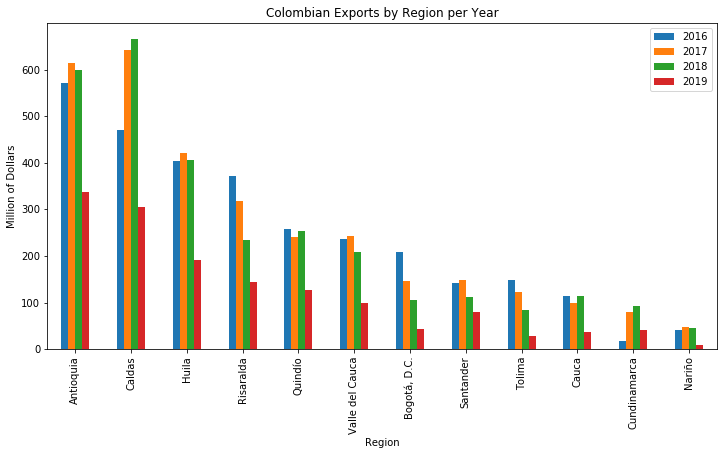

In [5]:
Region_Exps.head(12).plot(kind='bar', x='Region', y=['2016','2017','2018','2019'],figsize=(12, 6))
plt.title('Colombian Exports by Region per Year')
plt.ylabel('Million of Dollars')
plt.xlabel('Region')

plt.show()

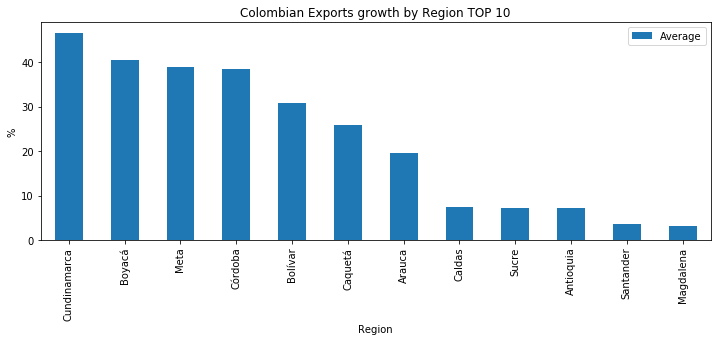

,Region,2014-2015,2015-2016,2016-2017,2017-2018,Average
0,Cundinamarca,31.337458,-13.331624,138.710173,29.809296,46.631326
1,Boyacá,0.000000,2.143277,433.493868,-273.417566,40.554895
2,Meta,0.000000,40.135241,4.976893,110.458957,38.892773
3,Córdoba,27.321792,14.460533,98.195294,13.819262,38.449220
4,Bolívar,70.761086,-127.789570,102.224966,78.521597,30.929520


In [6]:
# growth by region between years
Exps_Growth=pd.DataFrame()
Exps_Growth['Region']=Region_Exps['Region']
Exps_Growth['2014-2015'] = (Region_Exps['2015']-Region_Exps['2014'])/Region_Exps['Average']*100
Exps_Growth['2015-2016'] = (Region_Exps['2016']-Region_Exps['2015'])/Region_Exps['Average']*100
Exps_Growth['2016-2017'] = (Region_Exps['2017']-Region_Exps['2016'])/Region_Exps['Average']*100
Exps_Growth['2017-2018'] = (Region_Exps['2018']-Region_Exps['2017'])/Region_Exps['Average']*100
Exps_Growth['Average']=Exps_Growth.mean(axis=1)
Exps_Growth=Exps_Growth.sort_values(by=['Average'], ascending=False)
Exps_Growth.head(12).plot(kind='bar', x='Region', y=['Average'],figsize=(12, 4))
plt.title('Colombian Exports growth by Region TOP 10')
plt.ylabel('%')
plt.xlabel('Region')

plt.show()
Exps_Growth.reset_index(drop=True).head()

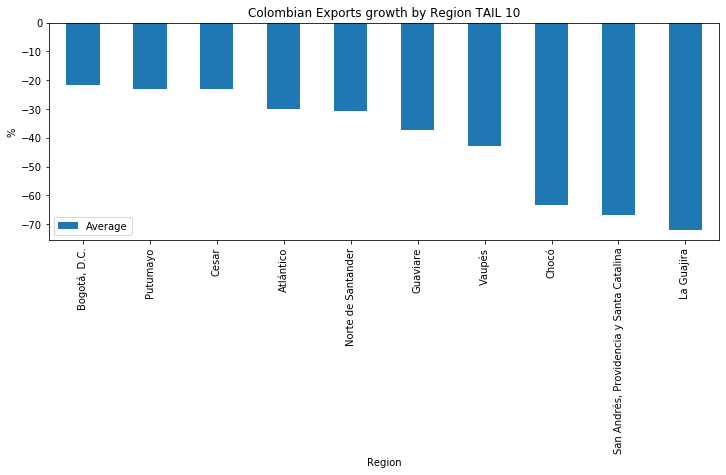

In [7]:
Exps_Growth.tail(10).plot(kind='bar', x='Region', y=['Average'],figsize=(12, 4))
plt.title('Colombian Exports growth by Region TAIL 10')
plt.ylabel('%')
plt.xlabel('Region')

plt.show()

#### 3.2 Group by Category

In [8]:
Category_Exps=Exports_DF.groupby('Category').sum().reset_index()
Category_Exps['Total']=Category_Exps.iloc[:,1:7].sum(axis=1)
Category_Exps['Average']=Category_Exps.iloc[:,1:7].mean(axis=1)
Category_Exps=Category_Exps.sort_values(by=['Total'], ascending=False).reset_index(drop=True)
Category_Exps.iloc[:,1:9]=Category_Exps.iloc[:,1:9]/1000000
print('Exports by Product Category has',Category_Exps.shape[0],'Rows and,', Category_Exps.shape[1], 'columns' )
Category_Exps.head()

Exports by Product Category has 12 Rows and, 9 columns


,Category,2014,2015,2016,2017,2018,2019,Total,Average
0,Trilla de café,2473.260563,2526.470898,2379.267592,2513.090734,2267.459840,1081.603544,13241.153172,2206.858862
1,Otros derivados del café,221.299644,233.621727,220.016536,224.865705,233.153149,116.476565,1249.433326,208.238888
2,Elaboración de productos de panadería,133.272579,97.685515,92.212480,100.973334,95.496111,42.503701,562.143720,93.690620
3,"Elaboración de cacao, chocolate y prod de conf...",121.515210,87.200311,105.070720,84.871409,91.606604,39.058075,529.322330,88.220388
4,"Descafeinado, tostión y molienda del café",43.433770,49.981457,44.801176,68.495834,67.767740,51.836802,326.316779,54.386130


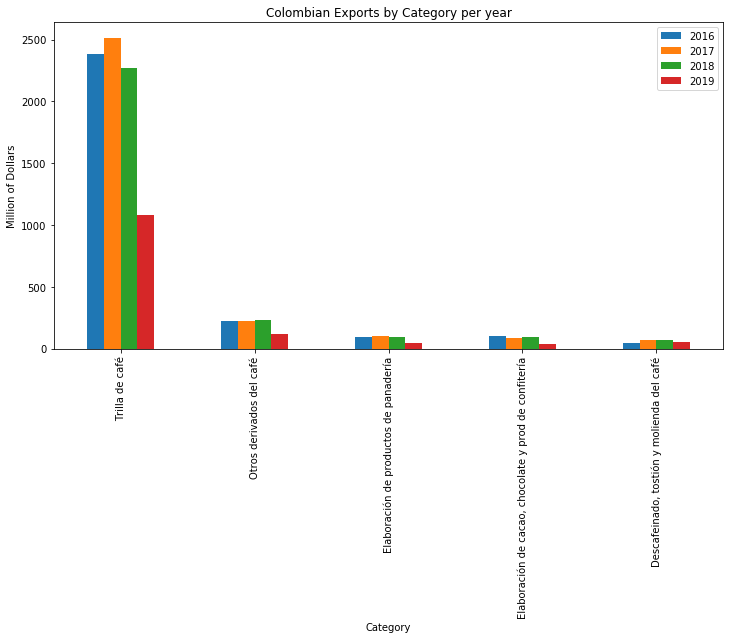

In [9]:
Category_Exps.head(5).plot(kind='bar', x='Category', y=['2016','2017','2018','2019'],figsize=(12, 6))
plt.title('Colombian Exports by Category per year')
plt.ylabel('Million of Dollars')
plt.xlabel('Category')

plt.show()

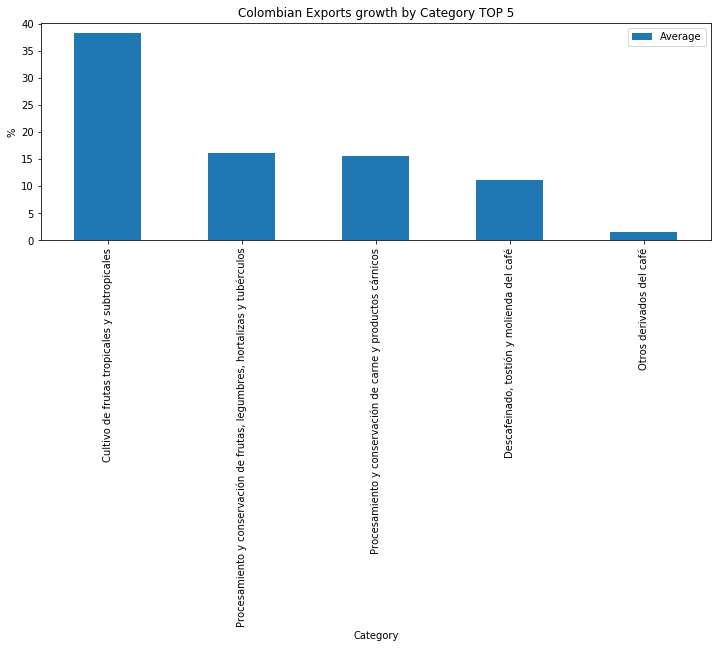

,Category,2014-2015,2015-2016,2016-2017,2017-2018,Average
0,Cultivo de frutas tropicales y subtropicales,18.620080,70.259075,51.366242,12.688275,38.233418
1,"Procesamiento y conservación de frutas, legumb...",15.632954,13.455669,20.246361,14.825145,16.040032
2,Procesamiento y conservación de carne y produc...,-23.442304,2.871297,67.222330,15.159912,15.452809
3,"Descafeinado, tostión y molienda del café",12.039259,-9.525003,43.567465,-1.338751,11.185743
4,Otros derivados del café,5.917282,-6.533453,2.328657,3.979777,1.423066


In [10]:
# growth by category between years
Category_Growth=pd.DataFrame()
Category_Growth['Category']=Category_Exps['Category']
Category_Growth['2014-2015'] = (Category_Exps['2015']-Category_Exps['2014'])/Category_Exps['Average']*100
Category_Growth['2015-2016'] = (Category_Exps['2016']-Category_Exps['2015'])/Category_Exps['Average']*100
Category_Growth['2016-2017'] = (Category_Exps['2017']-Category_Exps['2016'])/Category_Exps['Average']*100
Category_Growth['2017-2018'] = (Category_Exps['2018']-Category_Exps['2017'])/Category_Exps['Average']*100
Category_Growth['Average']=Category_Growth.mean(axis=1)
Category_Growth=Category_Growth.sort_values(by=['Average'], ascending=False).reset_index(drop=True)
Category_Growth.head().plot(kind='bar', x='Category', y=['Average'],figsize=(12, 4))
plt.title('Colombian Exports growth by Category TOP 5')
plt.ylabel('%')
plt.xlabel('Category')

plt.show()
Category_Growth.head()

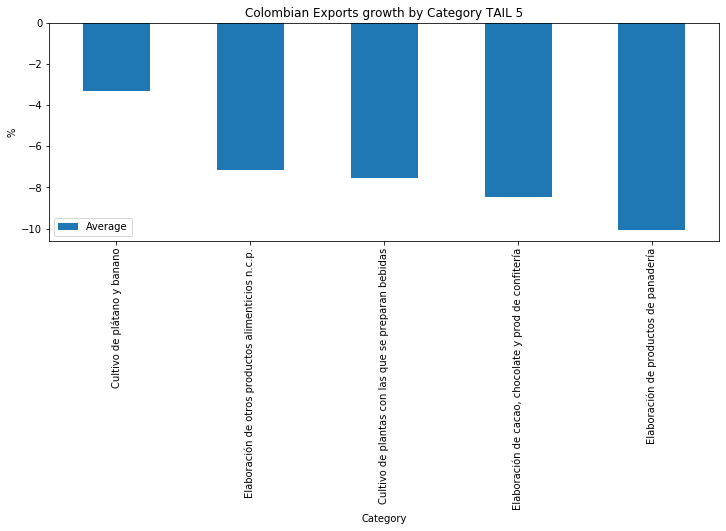

In [11]:
Category_Growth.tail().plot(kind='bar', x='Category', y=['Average'],figsize=(12, 4))
plt.title('Colombian Exports growth by Category TAIL 5')
plt.ylabel('%')
plt.xlabel('Category')

plt.show()

In [12]:
Dest_Exps=Exports_DF.groupby('Destination').sum().reset_index()
Dest_Exps['Total']=Dest_Exps.iloc[:,1:7].sum(axis=1)
Dest_Exps['Average']=Dest_Exps.iloc[:,1:7].mean(axis=1)
Dest_Exps=Dest_Exps.sort_values(by=['Total'], ascending=False).reset_index(drop=True)
Dest_Exps.iloc[:,1:9]=Dest_Exps.iloc[:,1:9]/1000000
print('Exports by Product Category has',Dest_Exps.shape[0],'Rows and,', Dest_Exps.shape[1], 'columns' )
Dest_Exps.head()

Exports by Product Category has 174 Rows and, 9 columns


,Destination,2014,2015,2016,2017,2018,2019,Total,Average
0,Estados Unidos,1179.309622,1225.928469,1183.804286,1306.534102,1222.838938,589.029083,6707.444499,1117.907416
1,Japón,255.212299,291.105781,259.931292,270.829182,209.042323,96.549661,1382.670538,230.445090
2,Alemania,225.386398,231.124852,251.025747,211.286913,212.759680,101.775285,1233.358876,205.559813
3,Canadá,183.564624,169.954780,190.308164,195.617612,187.106339,92.789637,1019.341156,169.890193
4,Bélgica,213.425806,217.729725,165.177974,142.178009,136.340989,67.042631,941.895135,156.982522


#### 3.2 Group by Destination

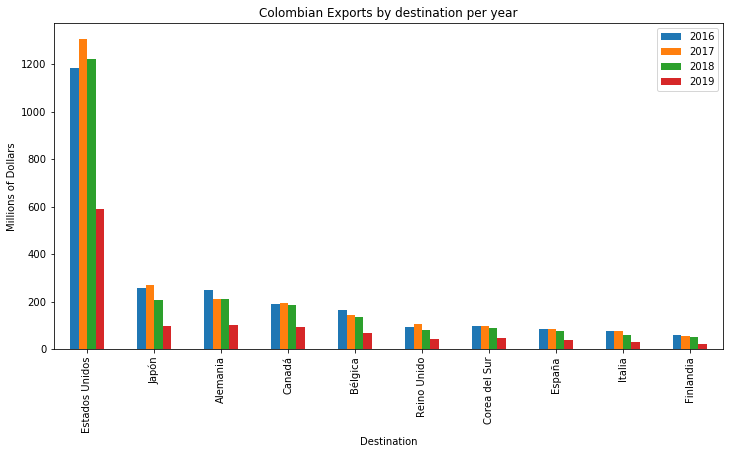

In [13]:
Dest_Exps.head(10).plot(kind='bar', x='Destination', y=['2016','2017','2018','2019'],figsize=(12, 6))
plt.title('Colombian Exports by destination per year')
plt.ylabel('Millions of Dollars')
plt.xlabel('Destination')

plt.show()

### 4 Select the best region for the investment
#### Let's only keep data from the last 3 years: 2016, 2017 and the first half of 2019. Analyze only the data of Colombian Exports in terms of sales value in thousands of dollars
And drop the remaining columns

In [14]:
#Let´s review the data and select the columns that contain the data of interest
Col_List= ['Departamento', 'FOBDO 2017', 'FOBDO 2018', 'FOBDO  ENE-JUN 2019']
Expsby_region = Col_Exports_DF[Col_List]   
Expsby_region.set_axis(['Region', '2017', '2018', '2019'], axis=1, inplace=True)
Expsby_region['Total']=Expsby_region.sum(axis=1)
Expsby_region.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Region,2017,2018,2019,Total
0,Antioquia,0.0,0.0,0.00,0.00
1,Antioquia,0.0,60290.1,43564.42,103854.52
2,Valle del Cauca,0.0,0.0,0.00,0.00
3,Valle del Cauca,0.0,0.0,0.00,0.00
4,"Bogotá, D.C.",4.0,0.0,0.00,4.00


In [15]:
# Group by region and sum export values
Expsby_region=Expsby_region.groupby('Region').sum().reset_index()
Expsby_region.iloc[:,1:5]=Expsby_region.iloc[:,1:5]/1000000

In [16]:
Expsby_region

,Region,2017,2018,2019,Total
0,Antioquia,613.578035,598.856402,336.743726,1549.178164
1,Arauca,0.140239,0.128348,0.164041,0.432628
2,Atlántico,6.056956,2.230487,1.542750,9.830194
3,"Bogotá, D.C.",146.757452,106.787289,43.160371,296.705112
4,Bolívar,2.631158,4.348195,0.912072,7.891425
5,Boyacá,0.053314,0.019853,0.000000,0.073167
6,Caldas,641.742743,666.141690,304.714387,1612.598820
7,Caquetá,0.228826,0.048947,0.000000,0.277773
8,Casanare,0.001371,0.000000,0.002100,0.003471
9,Cauca,98.766098,113.592569,37.102860,249.461527


In [17]:
# Function to Clear special characters
def normalize(s):
    replacements = (
        ("é", "e"),
        ("á", "a"),
        ("é", "e"),
        ("í", "i"),
        ("ó", "o"),
        ("ú", "u"),
    )
    for a, b in replacements:
        s = s.str.replace(a, b)
        #print ('Reemplazo',a,'Por', b, '\n',s)
    return s

In [18]:
# Normalize Regions names to match with the Colombia json file
Expsby_region['Region']=normalize(Expsby_region['Region']).str.upper()
Expsby_region['Region']=Expsby_region['Region'].replace('BOGOTA, D.C.', 'SANTAFE DE BOGOTA D.C')
Expsby_region['Region']=Expsby_region['Region'].replace('SAN ANDRES, PROVIDENCIA Y SANTA CATALINA', 'ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA CATALINA')
Expsby_region.sort_values(by=['Total'], ascending=False).reset_index(drop=True)

,Region,2017,2018,2019,Total
0,CALDAS,641.742743,666.141690,304.714387,1612.598820
1,ANTIOQUIA,613.578035,598.856402,336.743726,1549.178164
2,HUILA,420.240562,406.720305,190.544706,1017.505573
3,RISARALDA,318.681931,235.384163,143.385564,697.451657
4,QUINDIO,241.316915,254.569640,127.360940,623.247495
5,VALLE DEL CAUCA,242.507899,207.800240,100.128434,550.436574
6,SANTANDER,148.688185,112.085489,79.930884,340.704558
7,SANTAFE DE BOGOTA D.C,146.757452,106.787289,43.160371,296.705112
8,CAUCA,98.766098,113.592569,37.102860,249.461527
9,TOLIMA,123.440268,83.397330,29.092578,235.930176


In [19]:
# install follium
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.11

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge

The following packages will be UPDATED:

    certifi: 2019.6.16-py36_1 conda-forge --> 2019.9.11-py36_0 conda-forge


certifi-2019.9.11    | 147 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Folium installed and imported!


#### 4.1 Choropleth Map

In [20]:
# download Colombia geojson file
!wget --quiet https://gist.githubusercontent.com/john-guerra/43c7656821069d00dcbc/raw/be6a6e239cd5b5b803c6e7c2ec405b793a9064dd/Colombia.geo.json
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


Now that we have the GeoJSON file, let's create a world map, centered around Colombia *latitude* and *longitude* values, with an intial zoom level of 2, and using *Mapbox Bright* style.

In [21]:
Col_geo = r'Colombia.geo.json' # geojson file
Col_lat=4
Col_Long=-72

# create a plain map
world_map = folium.Map(location=[Col_lat, Col_Long], zoom_start=6, tiles='Mapbox Bright')

In [22]:
# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=Col_geo,
    data=Expsby_region,
    columns=['Region', 'Total'],
    key_on='feature.properties.NOMBRE_DPT',
    fill_color='YlGn', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Colombian Exports by Department'
)

# display map
world_map

Let's inspect the top 5 regions sorted by exports values

In [23]:
Exports_Sorted= Expsby_region.sort_values(by=['2019'], ascending=False).head(5)

In [24]:
Exports_Sorted

,Region,2017,2018,2019,Total
0,ANTIOQUIA,613.578035,598.856402,336.743726,1549.178164
6,CALDAS,641.742743,666.141690,304.714387,1612.598820
16,HUILA,420.240562,406.720305,190.544706,1017.505573
24,RISARALDA,318.681931,235.384163,143.385564,697.451657
23,QUINDIO,241.316915,254.569640,127.360940,623.247495


#### 4.2 Lets inspect what king of products are exported from Antioquia Region


In [25]:
# Create a new DF based on Colombian Exports DF to analyze Colombian exports by category

Col_List= ['Departamento', 'Descripción CIIU Rev.4','Descripción NANDINA','Destino','FOBDO 2017', 'FOBDO 2018', 'FOBDO  ENE-JUN 2019']
Expsby_category = Col_Exports_DF[Col_List]   
Expsby_category.set_axis(['Region','Category','Subcategory','Destination','2017', '2018', '2019'], axis=1, inplace=True)
Expsby_category['Total']=Expsby_category.sum(axis=1)
Expsby_category.head()


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Region,Category,Subcategory,Destination,2017,2018,2019,Total
0,Antioquia,Elaboración de productos de panadería,"Pan crujiente llamado ""knackebrot"".",Estados Unidos,0.0,0.0,0.00,0.00
1,Antioquia,Elaboración de productos de panadería,"Pan crujiente llamado ""knackebrot"".",Panamá,0.0,60290.1,43564.42,103854.52
2,Valle del Cauca,Elaboración de productos de panadería,"Pan crujiente llamado ""knackebrot"".",Chile,0.0,0.0,0.00,0.00
3,Valle del Cauca,Elaboración de productos de panadería,"Pan crujiente llamado ""knackebrot"".",Reino Unido,0.0,0.0,0.00,0.00
4,"Bogotá, D.C.",Elaboración de productos de panadería,"Pan crujiente llamado ""knackebrot"".",Aruba,4.0,0.0,0.00,4.00


In [26]:
# Filter Col_Exports_DF where Region == 'Antioquia'
Antioquia_Exps_Bool= Expsby_category['Region']=='Antioquia'
Antioquia_Exps=Expsby_category[Antioquia_Exps_Bool]
Antioquia_Exps

,Region,Category,Subcategory,Destination,2017,2018,2019,Total
0,Antioquia,Elaboración de productos de panadería,"Pan crujiente llamado ""knackebrot"".",Estados Unidos,0.0,0.00,0.00,0.00
1,Antioquia,Elaboración de productos de panadería,"Pan crujiente llamado ""knackebrot"".",Panamá,0.0,60290.10,43564.42,103854.52
9,Antioquia,Elaboración de productos de panadería,Pan de especias.,Panamá,0.0,2881.67,0.00,2881.67
73,Antioquia,Elaboración de productos de panadería,Galletas dulces (con adición de edulcorante).,Aruba,287933.0,273639.20,142188.00,703760.20
74,Antioquia,Elaboración de productos de panadería,Galletas dulces (con adición de edulcorante).,Angola,0.0,0.00,80609.40,80609.40
...,...,...,...,...,...,...,...,...
6009,Antioquia,"Procesamiento y conservación de frutas, legumb...",Jugo de mango sin fermentar y sin adición de a...,Chile,0.0,0.00,0.00,0.00
6010,Antioquia,"Procesamiento y conservación de frutas, legumb...",Jugo de mango sin fermentar y sin adición de a...,España,0.0,0.00,0.00,0.00
6011,Antioquia,"Procesamiento y conservación de frutas, legumb...",Jugo de mango sin fermentar y sin adición de a...,Estados Unidos,7081.2,31534.44,5006.00,43621.64
6012,Antioquia,"Procesamiento y conservación de frutas, legumb...",Jugo de mango sin fermentar y sin adición de a...,Italia,0.0,0.00,7298.14,7298.14


#### 4.3 Lets inspect which are the destination of the Antioquia's export

In [27]:
# Group by Destination and sum export values
Antioquia_ExpsByDestination=Antioquia_Exps.groupby('Destination').sum().sort_values(by=['Total'], ascending=False).reset_index()
Antioquia_ExpsByDestination['Percentage']= Antioquia_ExpsByDestination['Total']/Antioquia_ExpsByDestination['Total'].sum(axis=0)*100
Antioquia_TopExpsByDestination=Antioquia_ExpsByDestination[['Destination','Percentage']].head(10)
Antioquia_TopExpsByDestination=Antioquia_TopExpsByDestination.append({'Destination':'Others', 'Percentage': 100- Antioquia_TopExpsByDestination['Percentage'].sum(axis=0)}, ignore_index=True)
Antioquia_TopExpsByDestination

,Destination,Percentage
0,Estados Unidos,43.686068
1,Canadá,5.299647
2,Japón,5.097584
3,Ecuador,4.454233
4,Países Bajos,4.353026
5,Alemania,4.148181
6,Reino Unido,3.778937
7,Corea del Sur,2.889307
8,Bélgica,2.705885
9,España,2.194875


In [28]:
#### 4.3 PIE Charts

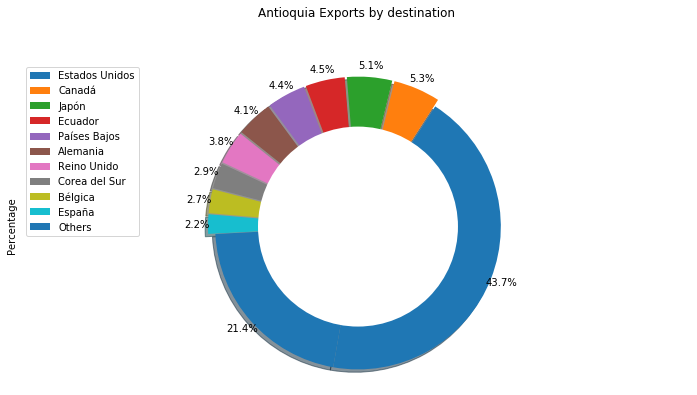

In [29]:
colors_list = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
explode_list = [0.0, 0.05, 0.05, 0.05, 0.05, 0.05,0.05,0.05,0.05,0.05,0] # ratio for each continent with which to offset each wedge.

Antioquia_TopExpsByDestination['Percentage'].plot(kind='pie',
                            figsize=(12, 6),
                            autopct='%1.1f%%', 
                            startangle=260,
                            #labels= Antioquia_TopExpsByDestination['Destination'],
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.08,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            #colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# scale the title up by 12% to match pctdistance
plt.title('Antioquia Exports by destination', y=1.12)
plt.axis('equal') 

# add legend
plt.legend(Antioquia_TopExpsByDestination['Destination'], loc='upper left')
#plt.tight_layout()
plt.show()

In [30]:
# Group by Category and sum export values
Antioquia_ExpsByCategory=Antioquia_Exps.groupby('Category').sum().sort_values(by=['Total'], ascending=False).reset_index()
Antioquia_ExpsByCategory['Percentage']= Antioquia_ExpsByCategory['Total']/Antioquia_ExpsByCategory['Total'].sum(axis=0)*100
Antioquia_TopExpsByCategory=Antioquia_ExpsByCategory[['Category','Percentage']].head(8)
Antioquia_TopExpsByCategory=Antioquia_TopExpsByCategory.append({'Category':'Others', 'Percentage': 100- Antioquia_TopExpsByCategory['Percentage'].sum(axis=0)}, ignore_index=True)
Antioquia_TopExpsByCategory

,Category,Percentage
0,Trilla de café,56.470788
1,Otros derivados del café,8.150923
2,"Descafeinado, tostión y molienda del café",7.961662
3,Elaboración de productos de panadería,7.466225
4,Cultivo de frutas tropicales y subtropicales,6.080154
5,"Elaboración de cacao, chocolate y prod de conf...",5.830298
6,"Procesamiento y conservación de frutas, legumb...",3.296092
7,Procesamiento y conservación de carne y produc...,3.249334
8,Others,1.494524


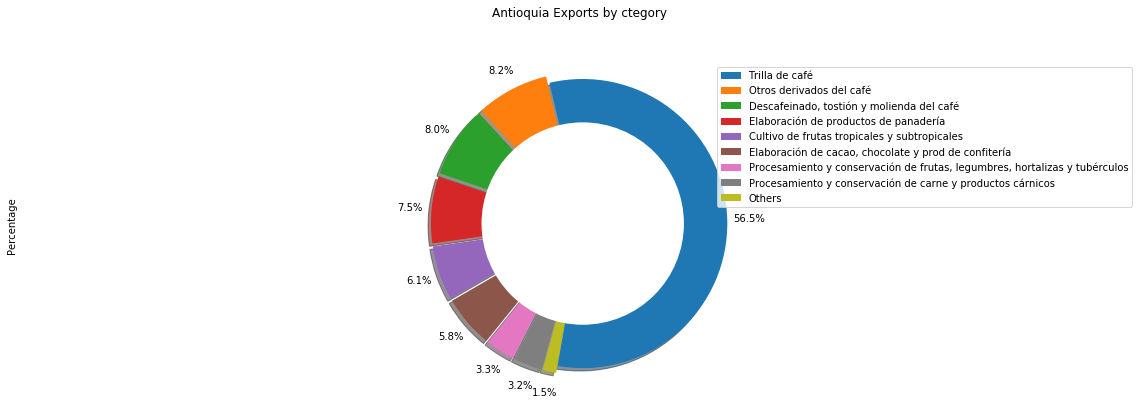

In [31]:
colors_list = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
explode_list = [0.0, 0.05, 0.05, 0.05, 0.05, 0.05,0.05,0.05,0.05] # ratio for each continent with which to offset each wedge.

Antioquia_TopExpsByCategory['Percentage'].plot(kind='pie',
                            figsize=(20, 6),
                            autopct='%1.1f%%', 
                            startangle=260,
                            #labels= Antioquia_TopExpsByDestination['Destination'],
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.15,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            #colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# scale the title up by 12% to match pctdistance
plt.title('Antioquia Exports by ctegory', y=1.12)
plt.axis('equal') 

# add legend
plt.legend(Antioquia_TopExpsByCategory['Category'], loc='upper right')
#plt.tight_layout()
plt.show()

### 5. Download database with the list of Antioquia Boroughs

In [32]:
# Read data from html to Panda Data Frame
url = 'http://www.antioquiadatos.gov.co/index.php/1-3-1-division-del-departamento-de-antioquia-por-subregion-zonas-y-municipios'
Antioquia_DF = pd.read_html(url, header=0)[0]

#Wrangling Data
Antioquia_DF.drop(['Código del departamento (1)','Subregiones','Código subregional (2)'], axis = 1, inplace=True) 
#Data Frame Size
print('The table has',Antioquia_DF.shape[0], 'rows and', Antioquia_DF.shape[1], 'Columns')

#review data
Antioquia_DF.head()

The table has 126 rows and 7 Columns


,Código región,Código zona,Código de municipio,Municipios,Código municipal (1),Zonas,Código zonal (3)
0,SR01,Z01,5001.0,Medellín,5001.0,Centro,1.0
1,SR01,Z02,5079.0,Barbosa,5079.0,Norte,2.0
2,SR01,Z02,5088.0,Girardota,5308.0,Norte,2.0
3,SR01,Z02,5212.0,Bello,5088.0,Norte,2.0
4,SR01,Z02,5308.0,Copacabana,5212.0,Norte,2.0


#### 5.1 Get the latitude and the longitude coordinates of each borough

In [33]:
import geocoder # import geocoder

In [34]:
Antioquia_coords=[]

for postal_code in Antioquia_DF['Municipios']:
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Antioquia, Colombia'.format(postal_code))
        lat_lng_coords = g.latlng

    Antioquia_coords.append([lat_lng_coords[0],lat_lng_coords[1]])
print (len(Antioquia_coords))

126


In [35]:
# Add Latitude and Longitude columns into Toronto_Data DF
column_names = ['Latitude','Longitude']
Antioquia_Data_coord=Antioquia_DF.join(pd.DataFrame(Antioquia_coords,columns=column_names))
Antioquia_Data_coord.head()

,Código región,Código zona,Código de municipio,Municipios,Código municipal (1),Zonas,Código zonal (3),Latitude,Longitude
0,SR01,Z01,5001.0,Medellín,5001.0,Centro,1.0,6.24589,-75.57457
1,SR01,Z02,5079.0,Barbosa,5079.0,Norte,2.0,6.43624,-75.33157
2,SR01,Z02,5088.0,Girardota,5308.0,Norte,2.0,6.37735,-75.44398
3,SR01,Z02,5212.0,Bello,5088.0,Norte,2.0,6.34034,-75.55916
4,SR01,Z02,5308.0,Copacabana,5212.0,Norte,2.0,6.34641,-75.50800


In [ ]:
import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.11

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          90 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.49-py_0   conda-forge
    geopy:         1.20.0-py_0 conda-forge


geopy-1.20.0         | 57 KB     | ##################################### | 100% 
geographiclib-1.49   | 

### 6 Foursquare Location data  - Popular venues around Antioquia Boroughs

In [ ]:
# Define Foursquare Constants: Credentials, Version and Limit
CLIENT_ID = '0WKQPIHLVV0E2XDXSZ20SZFW1OZR44GPZPIJDGZAAPMSH1NX' # your Foursquare ID
CLIENT_SECRET = 'FSM0E3XK0JMDT0PXBIZ21EEKNEDZU4XOFGBTSDRFUC5VQ0BF' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

In [ ]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
Antioquia_venues = getNearbyVenues(names=Antioquia_Data_coord['Municipios'],
                                   latitudes=Antioquia_Data_coord['Latitude'],
                                   longitudes=Antioquia_Data_coord['Longitude']
                                  )

In [ ]:
# Check the size of toronto_venues DF
print('There are' ,Antioquia_venues.shape[0], 'venues')
Antioquia_venues.head(-5)

#### 7 Let's review the venues near to Southwark, london; Let's suppose the investors come from there and we want to recomend a similar borough in Antioquia.

In [ ]:
# Identify Newham coordinates
lat_lng_coords = None
    # loop until you get the coordinates
while(lat_lng_coords is None):
    g = geocoder.arcgis('Southwark, London')
    lat_lng_coords = g.latlng
Southwark_lat=lat_lng_coords[0]
Southwark_long=lat_lng_coords[1]

print('Southwark Coordinates: Latitud:',Southwark_lat,'Longitud:', Southwark_long)

In [ ]:
Southwark_venues = getNearbyVenues(names=['Southwark'],
                                   latitudes=[Southwark_lat],
                                   longitudes=[Southwark_long]
                                  )
Southwark_venues

#### 7.1 Join Southwark venues with Antioquia Venues

In [ ]:
joined_venues= pd.concat([Southwark_venues, Antioquia_venues]).reset_index(drop=True)
joined_venues.head()

In [ ]:
# Count Venues per 'Borough'
joined_venues.groupby('Borough').count()

In [ ]:
VenuesperBorough=joined_venues.groupby('Borough').count()
VenuesperBorough.reset_index(level=0, inplace=True)
Southwark_Bool=VenuesperBorough['Borough']!='Southwark'
VenuesperBorough=VenuesperBorough[Southwark_Bool]

VenuesperBorough.sort_values(by=['Venue'], ascending=True).plot(kind='bar',x ='Borough', y='Venue', figsize=[19,4])

#### 7.2 Count unique categories from all the returned venues

In [ ]:
print('There are {} uniques categories.'.format(len(joined_venues['Venue Category'].unique())))

### 8. Analyze Each Borough in Antioquia

In [ ]:
# one hot encoding
Boroughs_onehot = pd.get_dummies(joined_venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
Boroughs_onehot['Borough'] = joined_venues['Borough'] 
# move Borough column to the first column
fixed_columns = [Boroughs_onehot.columns[-1]] + list(Boroughs_onehot.columns[:-1])
Boroughs_onehot = Boroughs_onehot[fixed_columns]
print('There are', Boroughs_onehot.shape[0], 'venues, into',  Boroughs_onehot.shape[1], 'categories' )
Boroughs_onehot.head()

#### 8.1 Group by Borough

In [ ]:
Boroughs_grouped = Boroughs_onehot.groupby('Borough').mean().reset_index()
Boroughs_grouped

#### 8.2 Split the Boroughs_venue data frame to check boroughs only in Antioquia. After we will use the Southwark venues to compare

In [ ]:
#Antioquia_categories contains only Antioquia Venues
Antioquia_Bool=Boroughs_grouped['Borough']!='Southwark'
Antioquia_categories=Boroughs_grouped[Antioquia_Bool]

#Southwark_categories contains only Southwark Venues
Southwark_Bool=Boroughs_grouped['Borough']=='Southwark'
Southwark_categories=Boroughs_grouped[Southwark_Bool]
Southwark_categories

#### 8.3 The top 10 most common venues for each Borough

In [ ]:
# Function to sort freq of venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [ ]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Boroughs_venues_sorted = pd.DataFrame(columns=columns)
Boroughs_venues_sorted['Borough'] = Boroughs_grouped['Borough']

for ind in np.arange(Boroughs_grouped.shape[0]):
    Boroughs_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Boroughs_grouped.iloc[ind, :], num_top_venues)

Boroughs_venues_sorted.head()

### 9. Cluster Neighborhoods
Run *k*-means to cluster the boroughs into 5 clusters.

In [ ]:
# set number of clusters
kclusters = 5

Boroughs_grouped_clustering = Boroughs_grouped.drop('Borough', 1)
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Boroughs_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

In [ ]:
# add clustering labels
Boroughs_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Boroughs_merged = Antioquia_Data_coord

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Boroughs_merged = Boroughs_merged.join(Boroughs_venues_sorted.set_index('Borough'), on='Municipios')

Boroughs_merged.head() # check the last columns!

In [ ]:
# get the geographical coordinates of Antioquia
address = 'Antioquia, Colombia'

geolocator = Nominatim(user_agent="CA_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Antioquia are {}, {}.'.format(latitude, longitude))

#### 9.1 Plot a map with boroughs into clusters

In [ ]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=8)
Boroughs_merged.dropna(axis=0, inplace= True) #Drop rows with No venues found
#Toronto_merged['Cluster Labels'].astype('int32')

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Boroughs_merged['Latitude'], Boroughs_merged['Longitude'], Boroughs_merged['Municipios'], Boroughs_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

##### 9.2 Examine Clusters
#### Examine each cluster and determine the discriminating venue categories that distinguish each cluster.

### CLUSTER 1

In [ ]:
Boroughs_merged.loc[Boroughs_merged['Cluster Labels'] == 0, Boroughs_merged.columns[[3] + list(range(10, Boroughs_merged.shape[1]))]]

### CLUSTER 2

In [ ]:
Boroughs_merged.loc[Boroughs_merged['Cluster Labels'] == 1, Boroughs_merged.columns[[3] + list(range(10, Boroughs_merged.shape[1]))]]

### CLUSTER 3

In [ ]:
Boroughs_merged.loc[Boroughs_merged['Cluster Labels'] == 2, Boroughs_merged.columns[[3] + list(range(10, Boroughs_merged.shape[1]))]]

### CLUSTER 4

In [ ]:
Boroughs_merged.loc[Boroughs_merged['Cluster Labels'] == 3, Boroughs_merged.columns[[3] + list(range(10, Boroughs_merged.shape[1]))]]

### CLUSTER 5

In [ ]:
Boroughs_merged.loc[Boroughs_merged['Cluster Labels'] == 4, Boroughs_merged.columns[[3] + list(range(10, Boroughs_merged.shape[1]))]]

### 10. Identify Boroughs in Antioquia similar to Southwark, We will identify most common venues in each borough in Antiquia and compare with the most common veneus in Southwark

In [ ]:
import scipy

#ary = scipy.spatial.distance.cdist(d1.iloc[:,1:], d2.iloc[:,1:], metric='euclidean')


#Southwark_categories

In [ ]:
Southwark_categories.iloc[:,1:]-Southwark_categories.iloc[:,1:]

In [ ]:
Antioquia_categories.iloc[0:1,1:]

#### 10.1 Calculate Euclidean Distance

In [ ]:
Borough_Distance=scipy.spatial.distance.cdist(Southwark_categories.iloc[:,1:],Antioquia_categories.iloc[:,1:], metric='euclidean')
Borough_Distance

In [ ]:
Borough_Distance.size

In [ ]:
Borough_distance_PD = pd.DataFrame()
Borough_distance_PD['Borough']=Antioquia_categories['Borough']
Borough_distance_PD['Distance'] = Borough_Distance[0]
Borough_distance_PD

In [ ]:
#### 10.2 Sort by Distance

In [ ]:
Borough_distance_PD.sort_values(by=['Distance'], ascending=True)

In [ ]:
#Antioquia_categories contains only Antioquia Venues
Medellin_bool=Boroughs_venues_sorted['Borough']=='Medellín'
Medellin_venues=Boroughs_venues_sorted[Medellin_bool]
Medellin_venues

In [ ]:
Southwark_bool=Boroughs_venues_sorted['Borough']=='Southwark'
Southwark_venues=Boroughs_venues_sorted[Southwark_bool]
Southwark_venues